# Fink-FAT Tutorials

### Get the alerts from the fink database

In [1]:
import io
import requests
import pandas as pd

In [2]:
r_lc = requests.post(
  'https://fink-portal.org/api/v1/ssocand',
  json={
    'kind': "lightcurves", # Mandatory, `orbParams` or `lightcurves`
    # 'ssoCandId': int, # optional, if you know a trajectory ID. Otherwise returns all.
    # 'start_date': str, # optional. Only for lightcurves. Default is 2019-11-01
    # 'stop_date': str, # optional. Only for lightcurves. Default is today.
    # 'output-format': str
    'maxnumber': 15000
  }
)

In [3]:
# Format output in a DataFrame
pdf_lc = pd.read_json(io.BytesIO(r_lc.content)).sort_values(["d:ssoCandId", "d:jd"])
pdf_lc

,d:assoc_tag,d:candid,d:dec,d:fid,d:jd,d:magpsf,d:nid,d:objectId,d:ra,d:sigmapsf,d:ssoCandId
11998,I,2476372023315015024,13.081433,2,2.460231e+06,17.167105,2476,ZTF23abjovyv,38.919989,0.038061,FF04112023aaaacti
12000,I,2476378843315015021,13.081166,1,2.460231e+06,17.757242,2476,ZTF23abjphna,38.919244,0.067864,FF04112023aaaacti
12008,A,2482327453615015018,12.870181,2,2.460237e+06,17.108437,2482,ZTF23ablrlxa,38.238813,0.044484,FF04112023aaaacti
12014,A,2487400923815015000,12.682060,2,2.460242e+06,17.025036,2487,ZTF23abnbdkc,37.621703,0.039644,FF04112023aaaacti
12016,A,2496209324315015004,12.349785,1,2.460251e+06,17.637896,2496,ZTF23abofdlw,36.511430,0.052509,FF04112023aaaacti
...,...,...,...,...,...,...,...,...,...,...,...
11968,I,2427464595815015002,14.544699,2,2.460182e+06,16.756470,2427,ZTF23aaztxjt,42.432385,0.013706,FF31082023aaaactb
11971,T,2431361575815015011,14.552781,2,2.460186e+06,16.723260,2431,ZTF23abakxsy,42.575703,0.016129,FF31082023aaaactb
11972,T,2431460825815015006,14.552960,1,2.460186e+06,17.171831,2431,ZTF23abameay,42.578580,0.020825,FF31082023aaaactb
11974,T,2433421885815015000,14.554494,2,2.460188e+06,16.746605,2433,ZTF23abarxae,42.634855,0.027243,FF31082023aaaactb


## Plot lightcurves and trajectories

In [4]:
import ssotuto_utils as sso_utils
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 200

ff_id = "FF04112023aaaacti"

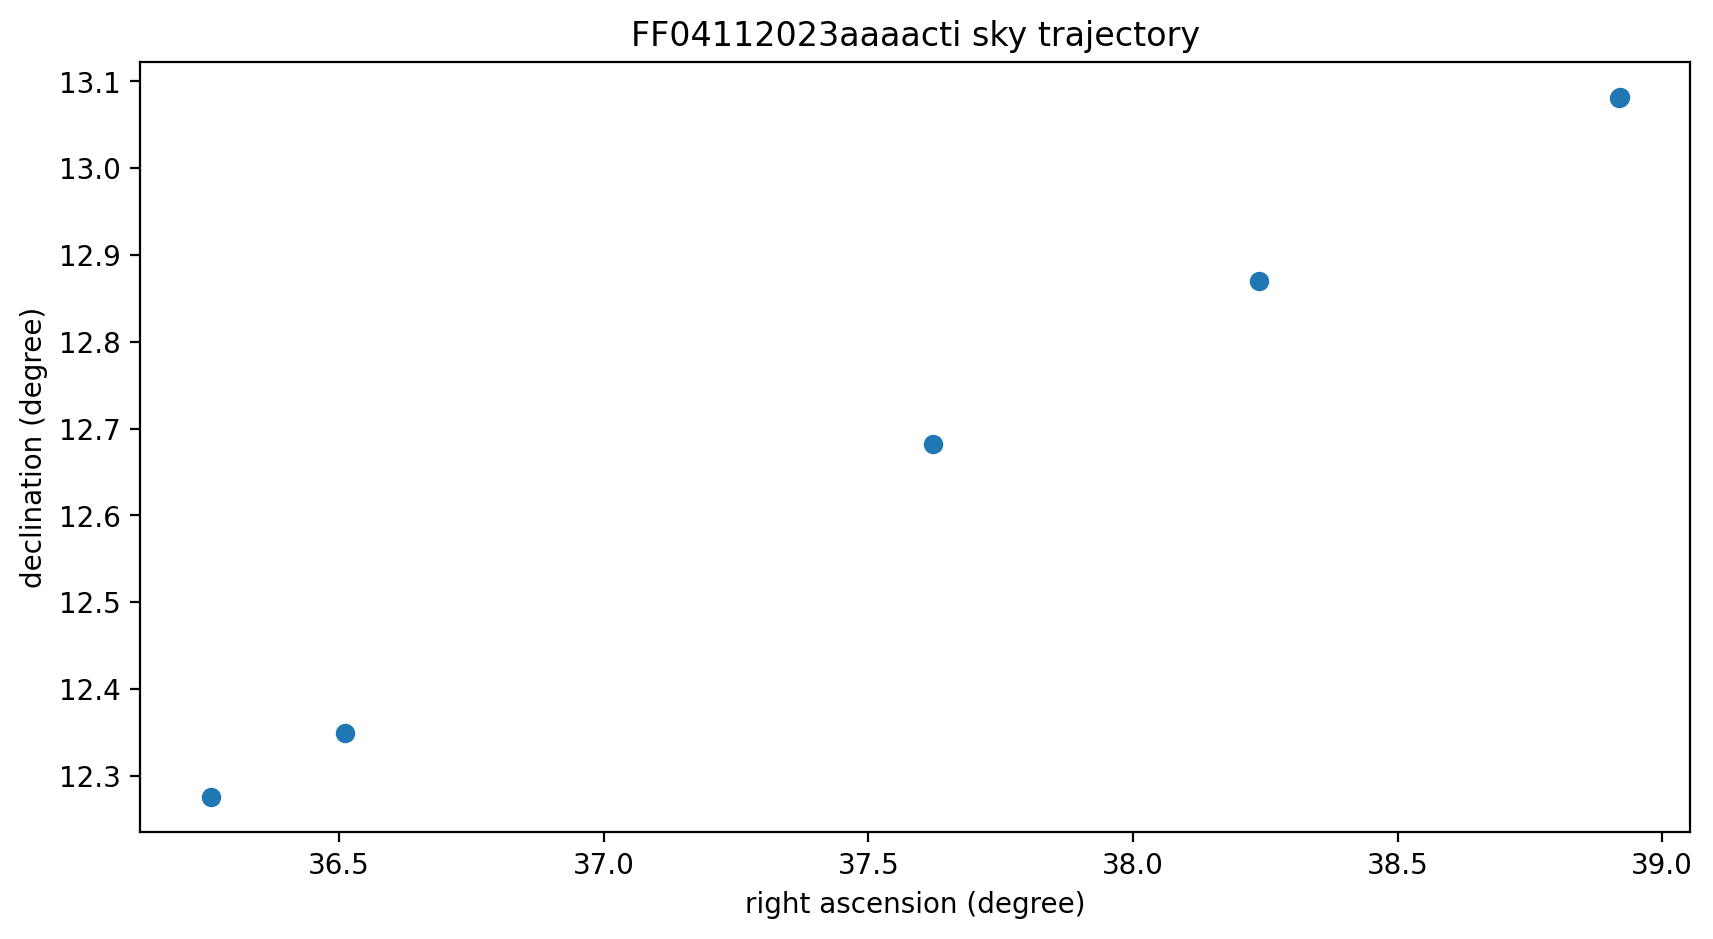

In [5]:
sso_utils.plot_traj(pdf_lc, ff_id)

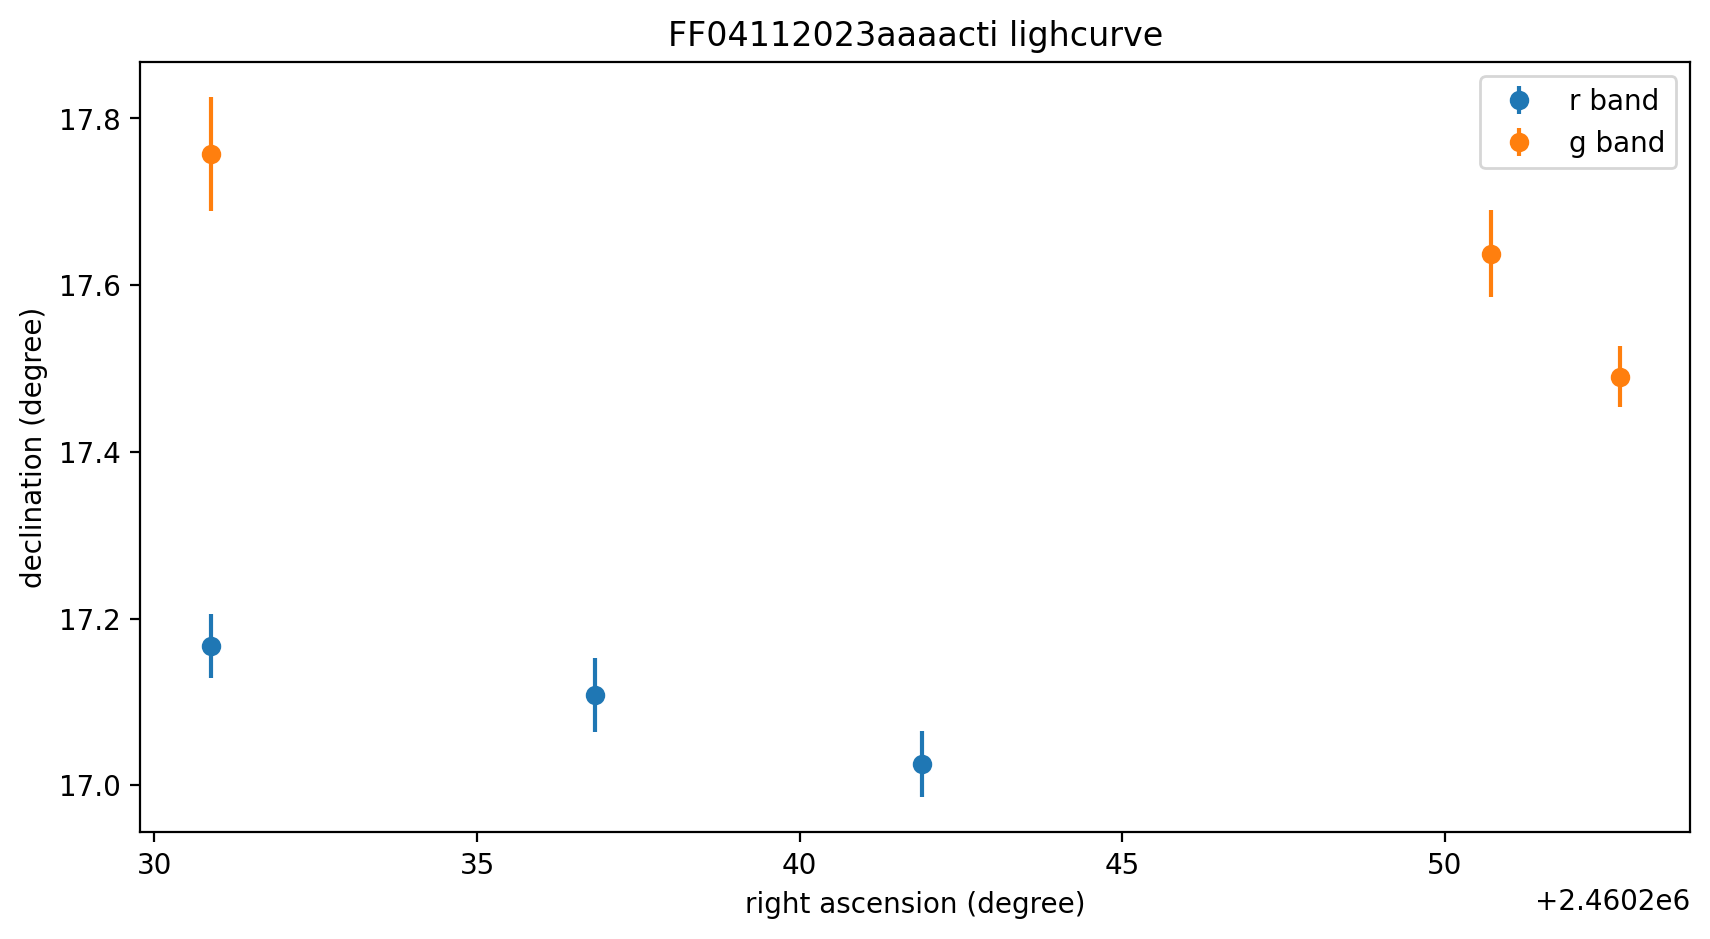

In [6]:
sso_utils.plot_lc(pdf_lc, ff_id)

## Ephemeries

#### get fink_fat orbital parameters

In [7]:
r_lc = requests.post(
  'https://fink-portal.org/api/v1/ssocand',
  json={
    'kind': "orbParams", # Mandatory, `orbParams` or `lightcurves`
    # 'ssoCandId': int, # optional, if you know a trajectory ID. Otherwise returns all.
    # 'start_date': str, # optional. Only for lightcurves. Default is 2019-11-01
    # 'stop_date': str, # optional. Only for lightcurves. Default is today.
    # 'output-format': str
    'maxnumber': 15000
  }
)
# Format output in a DataFrame
pdf_orb = pd.read_json(io.BytesIO(r_lc.content)).sort_values(["d:ssoCandId", "d:ref_epoch"])
pdf_orb

,d:a,d:arg_peric,d:chi_reduced,d:e,d:i,d:long_node,d:mean_anomaly,d:ref_epoch,d:rms_a,d:rms_arg_peric,d:rms_e,d:rms_i,d:rms_long_node,d:rms_mean_anomaly,d:ssoCandId
0,8.876244,265.001565,0.950000,0.559389,1.934036,91.325922,10.610958,2.460253e+06,1.040960,3.896930,0.072021,0.068450,2.020710,2.270480,FF04112023aaaacti
1,13.516634,112.315698,-1.000000,0.646187,10.007624,207.986038,7.123208,2.460197e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,FF09092023aaaactc
2,9.124433,0.373788,1.048333,0.432497,1.909824,94.671843,289.718610,2.460234e+06,20.039200,186.510000,1.582930,0.206581,9.459010,440.092000,FF16102023aaaactf
3,34.872544,98.709332,-1.000000,0.949610,7.475873,50.101567,357.832291,2.460208e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,FF20092023aaaactd
4,2.605905,156.855048,2.571429,0.348782,10.946437,44.521540,3.395080,2.460058e+06,0.041450,0.835243,0.005279,0.224460,0.198487,0.357818,FF2023aaaaaaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,3.257885,56.855087,32.768333,0.274122,15.440399,273.196304,19.241595,2.460169e+06,0.479430,2.305320,0.096842,0.122836,2.341170,5.275650,FF2023aaaacta
1851,9.875010,151.579272,-1.000000,0.903645,0.744524,178.668622,1.571952,2.460239e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,FF21102023aaaactg
1852,4.664265,141.585135,1.180000,0.406247,1.049503,36.352962,256.853280,2.460242e+06,0.905759,14.415000,0.941299,1.031960,0.972960,131.694000,FF24102023aaaacth
1853,4.820129,115.820384,0.848750,0.244321,1.137556,35.690486,269.970155,2.460214e+06,0.239134,8.058060,0.224767,0.140292,0.056368,36.014600,FF26092023aaaacte


### Using Miriade

In [8]:
url = "https://ssp.imcce.fr/webservices/miriade/api/ephemcc.php"
orbital_params = 

SyntaxError: invalid syntax (1492048374.py, line 2)

In [9]:
import os
import json
import io

In [10]:
def write_target_json(orb_list):

    dict_param = dict()
    dict_param["type"] = "Asteroid"
    dynamical_parameters = dict()
    
    dynamical_parameters["ref_epoch"] = orb_list[0]
    dynamical_parameters["semi_major_axis"] = orb_list[1]
    dynamical_parameters["eccentricity"] = orb_list[2]
    dynamical_parameters["inclination"] = orb_list[3]

    # dynamical_parameters["node_longitude"] = rows["Node"]
    # dynamical_parameters["perihelion_argument"] = rows["Peri"]
    # dynamical_parameters["mean_anomaly"] = rows["M"]

    dynamical_parameters["node_longitude"] = orb_list[4]
    dynamical_parameters["perihelion_argument"] = orb_list[5]
    dynamical_parameters["mean_anomaly"] = orb_list[6]

    dict_param["dynamical_parameters"] = dynamical_parameters
    
    f = io.StringIO()
    json.dump(dict_param, f, indent=4)
    f.seek(0)
    return f

In [11]:
def write_target(orb_df):
    orb_select = orb_df[[
        "d:ref_epoch", 
        "d:a", "d:e", "d:i", 
        "d:long_node", 
        "d:arg_peric", 
        "d:mean_anomaly", 
        "d:ssoCandId"
    ]].values

    return [write_target_json(orb_elem) for orb_elem in orb_select]

In [12]:
def request_ephem(in_memory_json, ephem_date, tr_id):
    url = "https://ssp.imcce.fr/webservices/miriade/api/ephemcc.php"
    # url = "https://ssp.imcce.fr/webservices/miriade/miriade.php"
    
    params = {
        "-name": "",
        "-type": "Asteroid",
        "-tscale": "UTC",
        "-observer": "I41",
        "-theory": "INPOP",
        "-teph": 1,
        "-tcoor": 5,
        "-oscelem": "MPCORB",
        "-mime": "json",
        "-output": "--jd",
        "-from": "MiriadeDoc",
    }
    
    print(in_memory_json.read().encode())
    in_memory_json.seek(0)
    files = {
        "target": in_memory_json.read().encode(),
        "epochs": ("epochs", "\n".join(["%.6f" % epoch.jd for epoch in ephem_date])),
    }

    r = requests.post(url, params=params, files=files, timeout=2000)
    print(r.content)
    j = r.json()
    print(j)
    ephem = pd.DataFrame.from_dict(j["data"])

    coord = SkyCoord(ephem["RA"], ephem["DEC"], unit=(u.deg, u.deg))

    ephem["cRA"] = coord.ra.value * 15
    ephem["cDec"] = coord.dec.value
    ephem["trajectory_id"] = tr_id
    
    return ephem

In [13]:
t = write_target(pdf_orb.iloc[:5])

In [14]:
t[0].read().encode()

b'{\n    "type": "Asteroid",\n    "dynamical_parameters": {\n        "ref_epoch": 2460252.712930341,\n        "semi_major_axis": 8.8762439475,\n        "eccentricity": 0.5593886219,\n        "inclination": 1.9340360218,\n        "node_longitude": 91.3259224228,\n        "perihelion_argument": 265.0015651514,\n        "mean_anomaly": 10.6109576858\n    }\n}'

In [15]:
from astropy.time import Time
import numpy as np

In [16]:
def generate_ephem(pdf, start, stop, step):
    time_range = Time(np.arange(Time(start).jd, Time(stop).jd, step), format="jd")
    in_memory_json = write_target(pdf)
    return [request_ephem(mem_json, time_range, tr_id) for mem_json, tr_id in zip(in_memory_json, pdf["d:ssoCandId"])]

In [17]:
generate_ephem(pdf_orb.iloc[:5], "2023-11-23", "2023-11-24", 1/24)

b'{\n    "type": "Asteroid",\n    "dynamical_parameters": {\n        "ref_epoch": 2460252.712930341,\n        "semi_major_axis": 8.8762439475,\n        "eccentricity": 0.5593886219,\n        "inclination": 1.9340360218,\n        "node_longitude": 91.3259224228,\n        "perihelion_argument": 265.0015651514,\n        "mean_anomaly": 10.6109576858\n    }\n}'
b'{"flag":-1,"ticket":178343078166051538,"message":"Miriade.ephemcc -> computeEphemeris: Error: ctoi: cannot convert string \'-\' to integer, empty string and no default value\\n"}'
{'flag': -1, 'ticket': 178343078166051538, 'message': "Miriade.ephemcc -> computeEphemeris: Error: ctoi: cannot convert string '-' to integer, empty string and no default value\n"}


KeyError: 'data'

### Using Sbpy

In [19]:
sso_utils.compute_ephem(pdf_orb.iloc[:3], [Time("2023-11-23").jd, Time("2023-11-24").jd])

***ERROR*** 24 Nov 2023 09:14:08UTC (File / new) TRACE BACK
***ERROR*** 24 Nov 2023 09:14:08UTC (Observatories / new) TRACE BACK 1
/home/roman/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 6 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
***ERROR*** 24 Nov 2023 09:14:08UTC (File / open) Could not open file (/usr/local/share/oorb/TAI-UTC.dat). Error code 2.
***ERROR*** 24 Nov 2023 09:14:08UTC (Time / new) TRACE BACK 3


,targetname,RA,DEC,RA*cos(Dec)_rate,DEC_rate,alpha,elong,r,Delta,V,trueanom,epoch
0,FF04112023aaaacti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1858-11-17
1,FF04112023aaaacti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1858-11-17
2,FF09092023aaaactc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1858-11-17
3,FF09092023aaaactc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1858-11-17
4,FF16102023aaaactf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1858-11-17
5,FF16102023aaaactf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1858-11-17


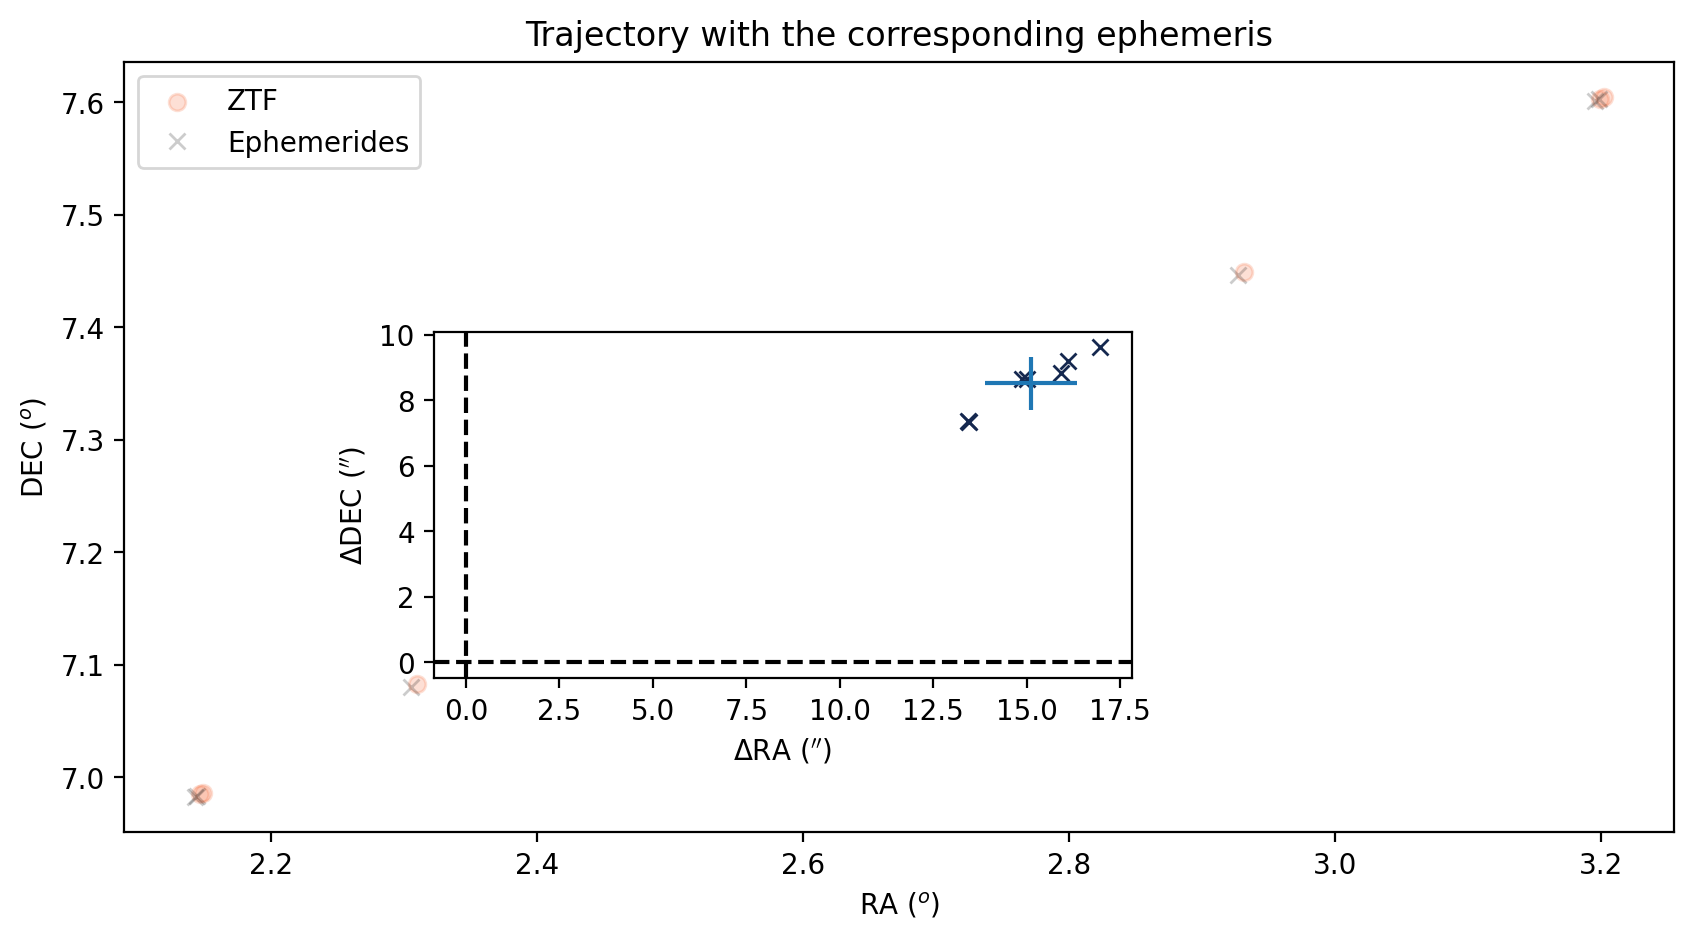

In [28]:
sso_utils.plot_perf_ephem(pdf_orb, pdf_lc, "FF09092023aaaactc")